<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/Busqueda_incremental_2(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> <span style="color:blue">Solución Numérica de Ecuaciones de Una Variable</center></span>




## Objetivos:

- Definir  métodos numéricos para la solución de ecuaciones de una variable utilizando argumentos matemáticos y computacionales.


- Determinar las raíces de una Ecuación No Lineal dada, empleando los métodos numéricos de manera eficiente y analizando los problemas de convergencia que puedan presentarse.


## Definición

Dada una ecuación no lineal, $f$, buscamos el valor de $x$ tal que: 

\begin{equation}
f(x) = 0
\end{equation}

con $f:[a,b]\rightarrow \Re$

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

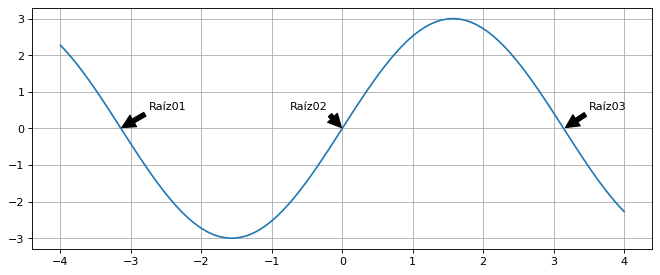

In [0]:
#import pylab
import matplotlib.pyplot as plt
import numpy

x = numpy.linspace(-4,4,100) # 100 linearly spaced numbers
#y = numpy.sin(x)/x # computing the values of sin(x)/x
y = numpy.sin(x) # computing the values of sin(x)
fig = plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

# compose plot

plt.plot(x,3*y) # 2*sin(x)/x and 3*sin(x)/x
ax.annotate('Raíz01', xy=(-3.15, 0), xytext=(-2.75, 0.5),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.annotate('Raíz02', xy=(0, 0), xytext=(-0.75, 0.5),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.annotate('Raíz03', xy=(3.15, 0), xytext=(3.5, 0.5),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.grid(True)
plt.show() # show the plot

Para hallar las raíces de una ecuación no lineal se requiere conocer:

- Número de raíces de la ecuación


- Información preliminar:  dominio, rango, continuidad, derivadas, intervalos de  crecimiento, tipos de raíces...


- Seleccionar un algoritmo conociendo sus limitaciones y dándole una aproximación inicial.


### Existencia de Raíces

El Objetivo de algunos de los métodos para determinar raices de una función no lineal es encontrar un intervalo que contenga al menos una raíz, y se basa en el **teorema del Valor Intermedio**:

- **Teorema del Valor Intermedio:** Sea $f$ una función continua en el intervalo $[a,b]$ y $k$ es cualquier número entre $f(a)$ y $f(b)$, entonces existe un número $c$ en el intervalo $(a,b)$ tal que $f(c)=k$

Otros teoremas del Cálculo que nos servirán para nuestro propósito en el capítulo son:


- **Existencia de Raíces:** Sea $f$ una función de variable y valor real definida en $[a,b]$. Si se cumple que:

  1. $f$ es continua en el intervalo $[a,b]$

  2. $f(a) \times f(b) < 0$

  entonces existe algún $x_m$ en $[a,b]$ que es la raíz de la ecuación $f(x)=0$.
  

- **Existencia de una única raíz:** Sea $f$ una función de variable y valor real definida en $[a,b]$. Si se cumple que:

  1. $f$ es continua en el intervalo $[a,b]$
  
  2. $f(a) \times f(b) < 0$
  
  3. $f$ es diferenciable en $(a,b)$ y $f'(x)$ no cambia de signo para todo $x \in [a,b]$
  
  entonces existe un único $x_m$ en $[a,b]$ que es raíz de la ecuación $f(x)=0$.

### Funciones con várias raíces:

Las funciones no lineales pueden tener ninguna, una o varias raíces en un intervalo dado, y es necesario localizar cada una de ellas.

- La posible existencia de raíces múltiples complica el problema.

  - En la vecindad de la raíz, tanto la función como su derivada se acercan a cero.
 
  - Las ecuaciones con un número par de raíces múltiples son tangentes al eje x y no lo cruzan.
  
  - Las ecuaciones con un número impar de raíces múltiples cruzan al eje x en un punto de inflexión.
  
  - En caso de raíces múltiples, al no haber cambio de signo, los métodos cerrados no son confiables.

## <span style="color:red">Método de las Búsquedas Incrementales:

La búsqueda consiste en empezar en un extremo del intervalo de interés y evaluar la función con pequeños incrementos a lo largo del intervalo.
- Si la longitud del incremento no es lo suficientemente pequeña, algunas raíces pueden pasar inadvertidas.

<img src="https://drive.google.com/uc?id=1F5JRMcYn-ac2NZiwTbXfVls_LPPOlyCz" alt="Lamp" width="520" height="420">

Si se detecta que una función $f$ es continua en un intervalo $[a,b]$ y que en dicho intervalo se presenta un cambio de signo en los valores de $f(a)$ y $f(b)$, se concluye que existe al menos una raíz en ese intervalo (pueden ser varias). 

A continuación se propone una opción de cómo podría ser un método que sirva como apoyo inicial a los métodos numéricos para encontrar raíces de forma aproximada en un intervalo dado.

### Método de Búsquedas Incrementales

1. Verificar la continidad de $f$ en $[a,b]$ empleando argumentos teóricos.

2. Elegir un valor de partida, $x_0$, y un $\Delta x$ que exprese el tamaño del intervalo que deseamos encontrar.

3. Generar una sucesión de valores $x_0, x_1, \ldots, x_n$ tal que $x_n = x_{n-1} + \Delta x$

4. Hallar el valor de $f(x_n)$ en cada $x_n$ generado.

5. Determinar los signos de $f(x_n)$ y $f(x_{n-1})$

6. Suspender el proceso cuando se presente un cambio de signo en $f(x_n)$ y $f(x_{n-1})$<br>
o cuando se llegue a un límite de iteraciones sin encontrar dicho cambio.

### Estrcutura algoritmo

La estructura de un algoritmo que implemente el método anterior, deberá considerar: 

- Datos Iniciales

- Iniciacilización del ciclo

- Ciclo

- Verificación de fin de ciclo

### Ejemplo:- Encontrar la raiz de la ecuación $f(x) = e^{3x-12}+x*cos(3x)-x^{2}-4 $ en el intervalo $[0,7]$ con una precisión de 4 cifras

In [0]:
def rootsearch(f,a,b,dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while np.sign(f1) == np.sign(f2):
        if x1  >=  b: return None,None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    else:
        return x1,x2

In [0]:
def f(x):
    return np.exp(3*x - 12.0) + x * np.cos(3*x) - x**2 + 4

In [0]:
incremento = 0.00001
x1 = 0.0; x2 = 7.0
dx = (x2 - x1)*incremento
root1,root2=rootsearch(f,x1,x2,dx)
print(root1,root2)
raiz=(root1+root2)/2
print('raiz = ',raiz)

2.369500000000416 2.369570000000416
raiz =  2.369535000000416


In [0]:
y = f(2.36984999)
y

-0.0029697766051368646

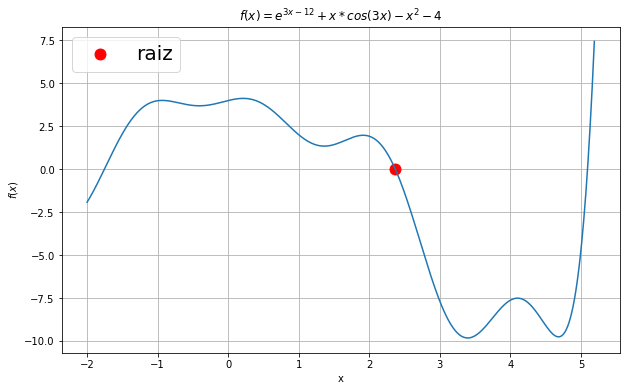

In [0]:
# Exact Solution Plot:

dt = 0.01
x = np.arange(-2.0, 5.2, dt)
plt.figure(figsize = (10,6) )
plt.grid(True)
plt.xlabel (r"x")
plt.ylabel (r'$f(x)$')
plt.title (r'$f(x) = e^{3x-12}+x*cos(3x)-x^{2}-4 $')
plt.scatter(raiz,f(raiz),s=120,c='red',label='raiz',zorder=2)
plt.legend(loc='upper left',fontsize=20)
plt.plot(x, f(x))
plt.grid(True)
plt.show()

### Otro Ejemplo  Encontrar la raiz de la ecuación $f(x) = x^{3} -10 x^{2} + 5.0 $ en el intervalo $[0,1]$ con una precisión de 4 cifras

In [0]:
def f(x): return x**3 - 10.0*x**2 + 5.0

In [0]:
x1 = 0.0; x2 = 1.0
dx = (x2 - x1)/10000.0
root1,root2=rootsearch(f,x1,x2,dx)
print(root1,root2)
raiz=(root1+root2)/2
print('raiz = ',raiz)

0.7345999999999354 0.7346999999999354
raiz =  0.7346499999999354


In [0]:
y = f(0.7346035)
y

1.0183067633562359e-07

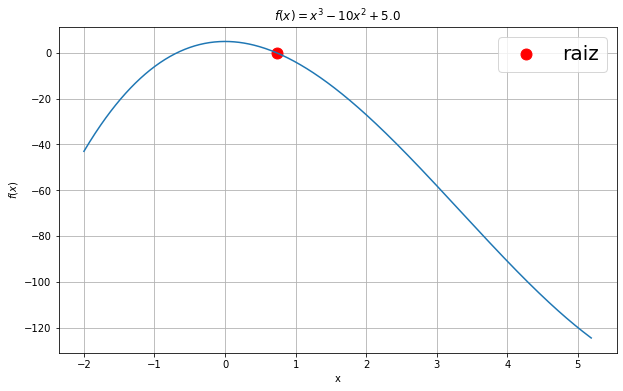

In [0]:
dt = 0.01
x = np.arange(-2.0, 5.2, dt)
plt.figure(figsize = (10,6) )
plt.grid(True)
plt.xlabel (r"x")
plt.ylabel (r'$f(x)$')
plt.title (r'$f(x) = x^{3} -10 x^{2} + 5.0 $')
plt.scatter(raiz,f(raiz),s=120,c='red',label='raiz',zorder=2)
plt.legend(loc='upper right',fontsize=20)
plt.plot(x, f(x))
plt.grid(True)
plt.show()